## Stock Market Analysis
We'll be answering the following questions along the way:

1. What was the change in price of the stock over time?
2. What was the daily return of the stock on average?
3. What was the moving average of the various stocks?
4. What was the correlation between different stocks' closing prices?
4. What was the correlation between different stocks' daily returns?
5. How much value do we put at risk by investing in a particular stock?
6. How can we attempt to predict future stock behavior?

##### Basic Analysis of Stock Information

In this section we'll go over how to handle requesting stock information with pandas, and how to analyze basic attributes of a stock.

In [1]:
import pandas as pd
from pandas import Series,DataFrame
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline
from pandas.io.data import DataReader

# For time stamps
from datetime import datetime

# For division
from __future__ import division

C:\Users\sneha\Anaconda2\lib\site-packages\matplotlib\__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))
C:\Users\sneha\Anaconda2\lib\site-packages\pandas\io\data.py:33: FutureWarning: 
The pandas.io.data module is moved to a separate package (pandas-datareader) and will be removed from pandas in a future version.
After installing the pandas-datareader package (https://github.com/pydata/pandas-datareader), you can change the import ``from pandas.io import data, wb`` to ``from pandas_datareader import data, wb``.
  FutureWarning)


In [4]:
# The tech stocks we'll use for this analysis
tech_list = ['AAPL','GOOG','MSFT','AMZN']

# Set up End and Start times for data grab
end = datetime.now()
start = datetime(end.year - 1,end.month,end.day)

#For loop for grabing yahoo finance data and setting as a dataframe

for stock in tech_list:   
    # Set DataFrame as the Stock Ticker
    globals()[stock] = DataReader(stock,'yahoo',start,end)

In [8]:

AAPL.head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2015-02-17,127.489998,128.880005,126.919998,127.830002,63152400,125.503506
2015-02-18,127.629997,128.779999,127.449997,128.720001,44891700,126.377307
2015-02-19,128.479996,129.029999,128.330002,128.449997,37362400,126.112217
2015-02-20,128.619995,129.500000,128.050003,129.500000,48948400,127.143110
2015-02-23,130.020004,133.000000,129.660004,133.000000,70974100,130.579411


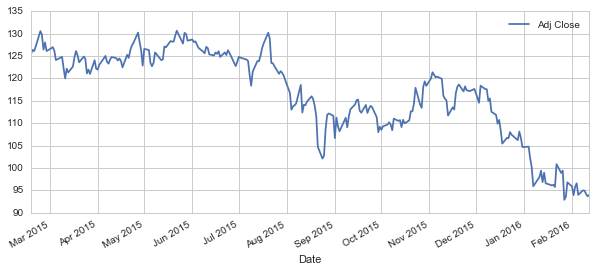

In [16]:
# Let's see a historical view of the closing price
AAPL['Adj Close'].plot(legend=True,figsize=(10,4))


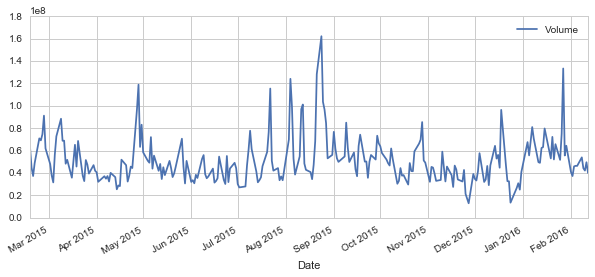

In [14]:
AAPL['Volume'].plot(legend=True,figsize=(10,4))

##### MOVING AVERAGES

In [17]:
# Let's go ahead and plot out several moving averages
ma_day = [10,20,50]

for ma in ma_day:
    column_name = "MA for %s days" %(str(ma))
    AAPL[column_name]=pd.rolling_mean(AAPL['Adj Close'],ma)

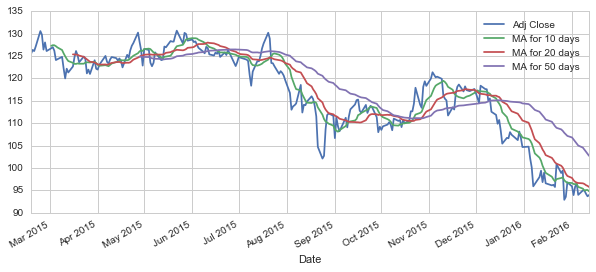

In [18]:
AAPL[['Adj Close','MA for 10 days','MA for 20 days','MA for 50 days']].plot(subplots=False,figsize=(10,4))

##### Section 2 - Daily Return Analysis
Now that we've done some baseline analysis, let's go ahead and dive a little deeper. We're now going to analyze the risk of the stock. In order to do so we'll need to take a closer look at the daily changes of the stock, and not just its absolute value. Let's go ahead and use pandas to retrieve teh daily returns for the Apple stock.

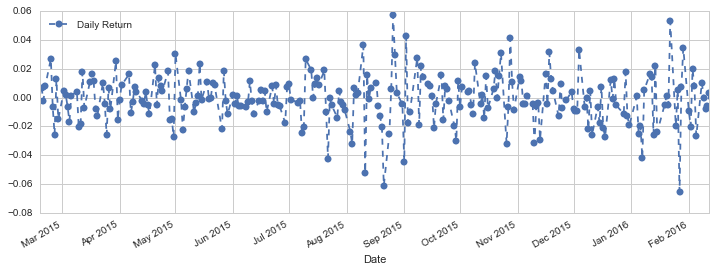

In [19]:
# We'll use pct_change to find the percent change for each day
AAPL['Daily Return'] = AAPL['Adj Close'].pct_change()
# Then we'll plot the daily return percentage
AAPL['Daily Return'].plot(figsize=(12,4),legend=True,linestyle='--',marker='o')

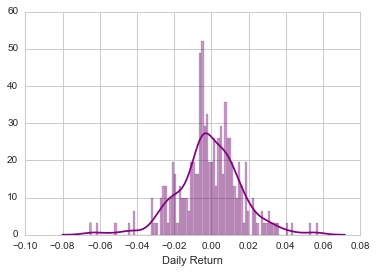

In [23]:
sns.distplot(AAPL['Daily Return'].dropna(),bins=100,color='purple')

In [24]:
closing_df = DataReader(['AAPL','GOOG','MSFT','AMZN'],'yahoo',start,end)['Adj Close']

In [26]:
closing_df.head()

,AAPL,AMZN,GOOG,MSFT
Date,,,,
2015-02-17,125.503506,375.429993,542.842504,42.726957
2015-02-18,126.377307,373.369995,539.702422,42.677933
2015-02-19,126.112217,379.000000,542.872432,42.648521
2015-02-20,127.143110,383.660004,538.952441,43.001475
2015-02-23,130.579411,380.140015,531.912381,43.285799


In [27]:
# Make a new tech returns DataFrame
tech_rets = closing_df.pct_change()

In [28]:
tech_rets.head()

,AAPL,AMZN,GOOG,MSFT
Date,,,,
2015-02-17,NaN,NaN,NaN,NaN
2015-02-18,0.006962,-0.005487,-0.005785,-0.001147
2015-02-19,-0.002098,0.015079,0.005874,-0.000689
2015-02-20,0.008174,0.012296,-0.007221,0.008276
2015-02-23,0.027027,-0.009175,-0.013062,0.006612


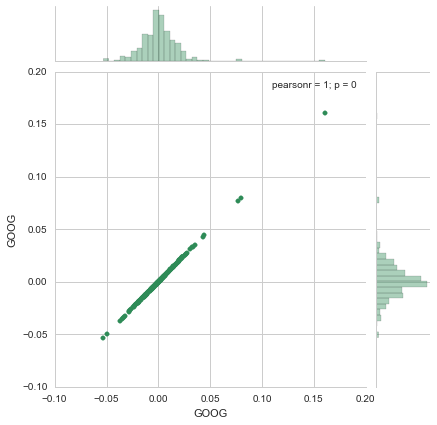

In [29]:
# Comparing Google to itself should show a perfectly linear relationship
sns.jointplot('GOOG','GOOG',tech_rets,kind='scatter',color='seagreen')

C:\Users\sneha\Anaconda2\lib\site-packages\matplotlib\__init__.py:892: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


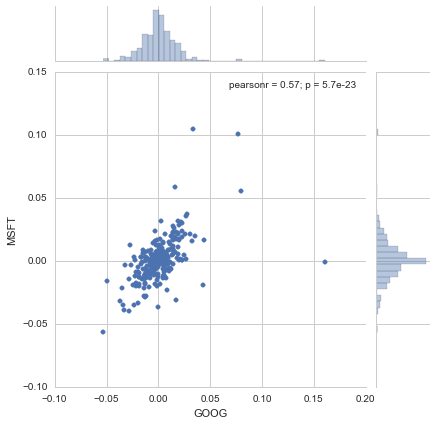

In [30]:
# We'll use joinplot to compare the daily returns of Google and Microsoft
sns.jointplot('GOOG','MSFT',tech_rets,kind='scatter')

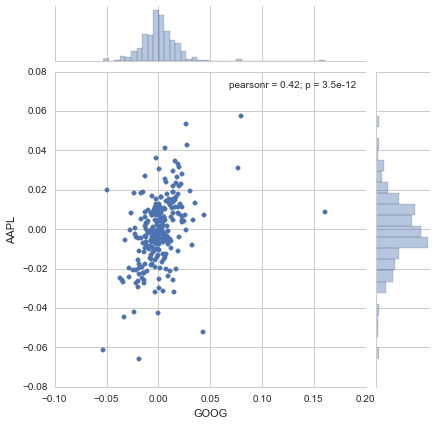

In [32]:
# We'll use joinplot to compare the daily returns of Google and Microsoft
sns.jointplot('GOOG','AAPL',tech_rets,kind='scatter')

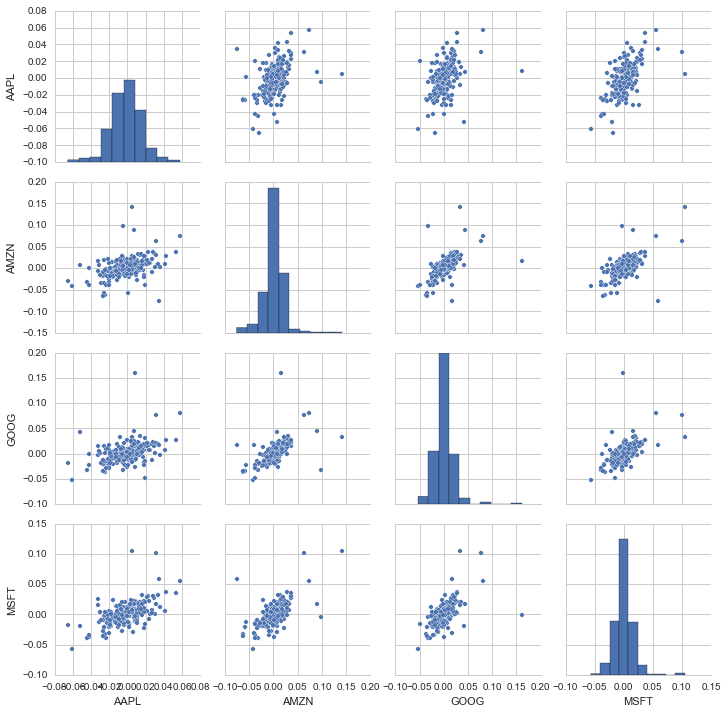

In [33]:
# We can simply call pairplot on our DataFrame for an automatic visual analysis of all the comparisons
sns.pairplot(tech_rets.dropna())

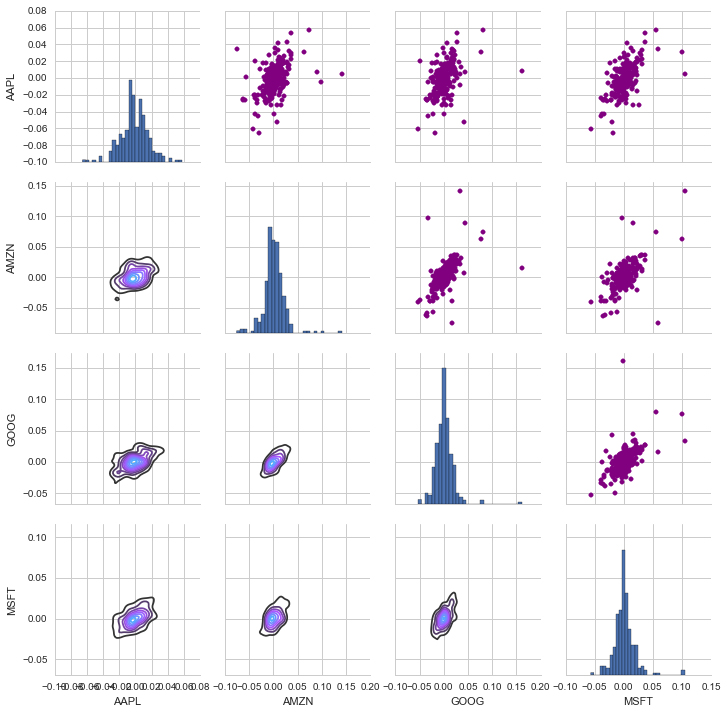

In [38]:
returns_fig = sns.PairGrid(tech_rets.dropna())
returns_fig.map_upper(plt.scatter,color='purple')
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')
returns_fig.map_diag(plt.hist,bins=30)

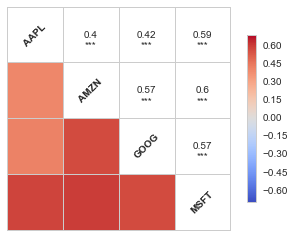

In [42]:
sns.corrplot(tech_rets.dropna(),annot=True)


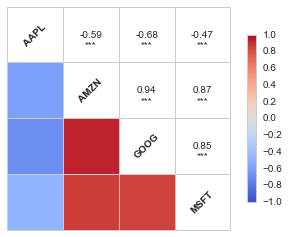

In [43]:
sns.corrplot(closing_df,annot=True)

## Risk Analysis

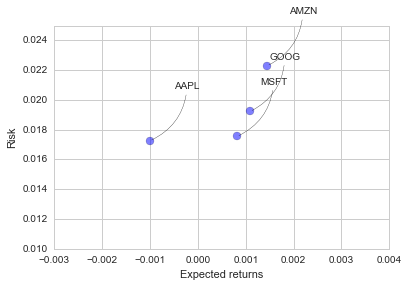

In [48]:
# Let's start by defining a new DataFrame as a clenaed version of the oriignal tech_rets DataFrame
rets = tech_rets.dropna()
area = np.pi*20
plt.scatter(rets.mean(), rets.std(),alpha = 0.5,s =area)
#Set the plot axis titles
plt.xlabel('Expected returns')
plt.ylabel('Risk')

# Set the x and y limits of the plot (optional, remove this if you don't see anything in your plot)
plt.ylim([0.01,0.025])
plt.xlim([-0.003,0.004])

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (50, 50),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        arrowprops = dict(arrowstyle = '-', connectionstyle = 'arc3,rad=-0.3'))

### Value at Risk
##### Bootstrap

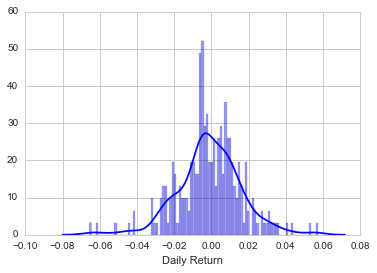

In [50]:
# Note the use of dropna() here, otherwise the NaN values can't be read by seaborn
sns.distplot(AAPL['Daily Return'].dropna(),bins=100,color='blue')

In [51]:
rets['AAPL'].quantile(0.05)

-0.02690671138946403

####  Monte Carlo method

In [52]:
# Set up our time horizon
days = 365

# Now our delta
dt = 1/days

# Now let's grab our mu (drift) from the expected return data we got for AAPL
mu = rets.mean()['GOOG']

# Now let's grab the volatility of the stock from the std() of the average return
sigma = rets.std()['GOOG']

In [53]:
def stock_monte_carlo(start_price,days,mu,sigma):
    ''' This function takes in starting stock price, days of simulation,mu,sigma, and returns simulated price array'''
    
    # Define a price array
    price = np.zeros(days)
    price[0] = start_price
    # Schok and Drift
    shock = np.zeros(days)
    drift = np.zeros(days)
    
    # Run price array for number of days
    for x in xrange(1,days):
        
        # Calculate Schock
        shock[x] = np.random.normal(loc=mu * dt, scale=sigma * np.sqrt(dt))
        # Calculate Drift
        drift[x] = mu * dt
        # Calculate Price
        price[x] = price[x-1] + (price[x-1] * (drift[x] + shock[x]))
        
    return price

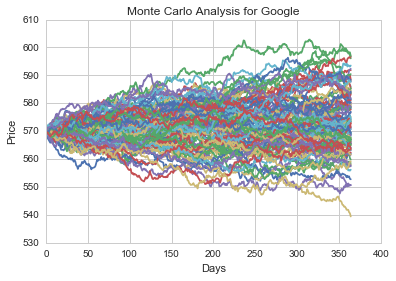

In [55]:
#Get start price from GOOG.head()
start_price = 569.85

for run in xrange(100):
    plt.plot(stock_monte_carlo(start_price,days,mu,sigma))
plt.xlabel("Days")
plt.ylabel("Price")  
plt.title('Monte Carlo Analysis for Google')

In [56]:
# Set a large numebr of runs
runs = 10000

# Create an empty matrix to hold the end price data
simulations = np.zeros(runs)

# Set the print options of numpy to only display 0-5 points from an array to suppress output
np.set_printoptions(threshold=5)

for run in xrange(runs):    
    # Set the simulation data point as the last stock price for that run
    simulations[run] = stock_monte_carlo(start_price,days,mu,sigma)[days-1];

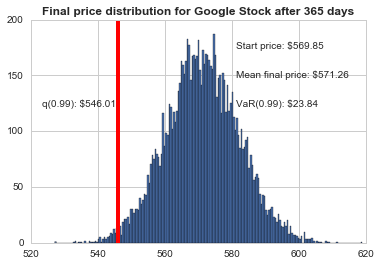

In [57]:
# Now we'lll define q as the 1% empirical qunatile, this basically means that 99% of the values should fall between here
q = np.percentile(simulations, 1)
    
# Now let's plot the distribution of the end prices
plt.hist(simulations,bins=200)

# Using plt.figtext to fill in some additional information onto the plot

# Starting Price
plt.figtext(0.6, 0.8, s="Start price: $%.2f" %start_price)
# Mean ending price
plt.figtext(0.6, 0.7, "Mean final price: $%.2f" % simulations.mean())

# Variance of the price (within 99% confidence interval)
plt.figtext(0.6, 0.6, "VaR(0.99): $%.2f" % (start_price - q,))

# Display 1% quantile
plt.figtext(0.15, 0.6, "q(0.99): $%.2f" % q)

# Plot a line at the 1% quantile result
plt.axvline(x=q, linewidth=4, color='r')

# Title
plt.title(u"Final price distribution for Google Stock after %s days" % days, weight='bold');